# Визуализация данных. Matplotlib

# Почему важно смотреть на данные

![](https://alexanderdyakonov.files.wordpress.com/2017/11/d0bad180d0bed0bbd0b8d0ba_d183d182d0bad0b0.jpg)

Нельзя используя лишь статистические величины делать выводы о данных!

Пример - [Квартет Энскомба](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0):

In [ ]:
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    '1': (x, y1),
    '2': (x, y2),
    '3': (x, y3),
    '4': (x4, y4)
}

In [ ]:
for label, (x, y) in datasets.items():
    print(f"Dataset {label}: N={len(x)}, x_mean={np.mean(x):.3f}, y_mean={np.mean(y):.3f}, x_std={np.std(x):.3f}, y_std={np.std(y):.3f}, r={np.corrcoef(x, y)[0][1]:.3f}")

Dataset 1: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.937, r=0.816
Dataset 2: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.937, r=0.816
Dataset 3: N=11, x_mean=9.000, y_mean=7.500, x_std=3.162, y_std=1.936, r=0.816
Dataset 4: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.936, r=0.817


Получили крайне близкие значения. Означает ли, что это наборы данных несут в себе одинаковые зависимости (выбраны из одного распределения)?

Посмотрим на график этих датасетов:

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/01/Anscombes_quartet_2.png)

Видим кардинально разные зависимости, у которых при этом одинаковые статистические величины. С ними нужно работать по разному:
- набор 1: хорошо описывается линейной зависимостью
- набор 2: плохо описывается линейной зависимостью, скорее всего полином (парабола, полином 2й степени)
- набор 3: явный выброс, который плохо описывается линейной зависимостью
- набор 4: еще один выброс в данных, плохо ложится на линейную зависимость

# Matplotlib

**Matplotlib** - Python-библиотека для двумерной графики, созданная в 2003 году как альтернатива платному MATLAB'y. Проект оказался настолько успешным, что matplotlib является стандартом для двумерной графики в анализе данных на python. Используя matplotlib можно нарисовать очень сложные графики, поэтому порог входа у него высокий. Для простых графиков есть удобные обертки, но кастомизация требует понимания деталей.

In [ ]:
import matplotlib as mpl  # стандартный алиас для matplotlib

Matplotlib состоит из множетства модулей и классов. Рисование в matplotlib состоит из последовательного нанесения объектов на холст. Объекты образуют иерархическую структуру. Задача пользователя описать эту структуру, а рисованием займется сама библиотека.

Рисунок в matplotlib имеет следующую структуру.
1. объект рисунок (Figure)
2. в рисунке - холст(Canvas)
3. на холсте - области рисования (Axes).
4. в областях рисования - элементы рисунка (Artists)

Обычные пользователи большую часть времени занимаются тем что работают с элементами рисунка располагая их в нужном порядке на областях рисования.

Элементы рисунка (Artists) можно разделить на две большие группы

 - **Примитивы** - простейшие элементы рисунка, такие как линии, прямоугольники, текст, изображения и т.д.
 - **Контейнеры** - рисунок (Figure), область рисования (Axes), координатные оси (Axis), деления на осях (Ticks).  

Библиотека манипулирует очень простыми графическими примитивами (линия, точка, отрезок, многоугольник).

Это совершенно неудобоно для людей - они мыслят высокоуровневыми абстракциями. Поэтому в matplotlib есть две обертки:
- **pylab** - "неудачный эксперимент", не используйте ее
- **pyplot** - "стандарт"

Подробнее про это - в [документации](https://matplotlib.org/2.0.2/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related).

In [ ]:
import matplotlib.pyplot as plt  # стандартный алиас для pyplot

Для того чтобы рисунки выводились в графический интерфейс надо вызвать [магическую команду](https://ipython.readthedocs.io/en/stable/interactive/magics.html) для jupyter

In [ ]:
# (!) С какого-то релиза стала необязательной
%matplotlib inline

In [ ]:
import numpy as np

Создадим рисунок гистограммы из 20 рандомных чисел в диапазоне от 0 до 6 невключительно:

[1 4 3 2 3 3 0 3 0 0 3 0 3 5 5 3 0 2 0 0]


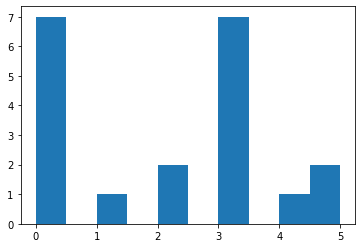

In [ ]:
array = np.random.randint(low=0, high=6, size=20)
print(array)

plt.hist(array)

# показать ВСЕ созданные рисунки
plt.show()

При вызове этих команд произошло приблизительно следующее:
1. Был создан рисунок (Figure).
2. В нем была создана одна область рисования (Axes).
3. На эту область были помещены оси X и Y (Axis) и 10 синих прямоугольников (Rectangle) 4 из которых нулевой высоты.
4. После этого у объекта рисунка вызвали методы show.

## Основные функции модуля `matplotlib.pyplot`

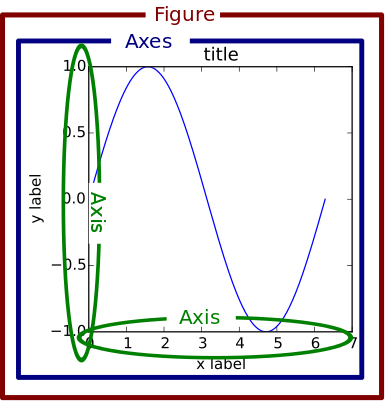




**Figure** - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.

**Axes** - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

Каждая область Axes содержит **XAxis** и **YAxis**. Они содержат, деления, метки и прочие вспомогательные атрибуты.

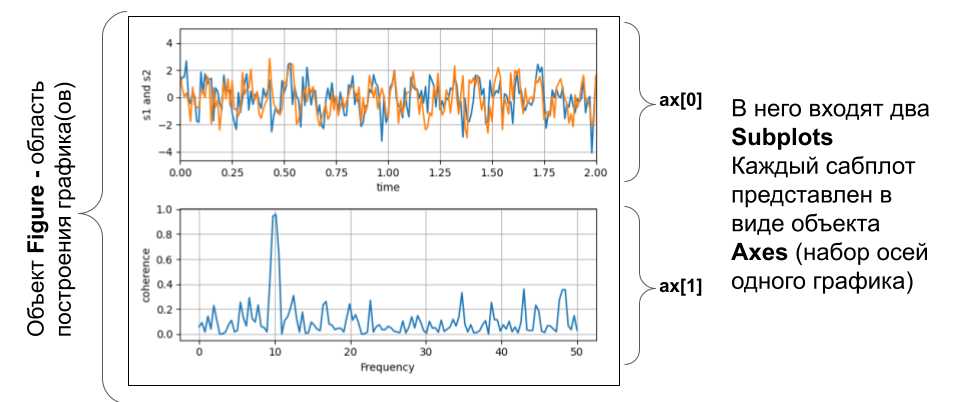

Далее мы перечислим самые часто используемые функции из модуля matplotlib.pyplot. Примеры будут минималистичны, все настройки будут по умолчанию.

### 2.1 Примитивы

Диаграмма рассеяния (scatter plot):

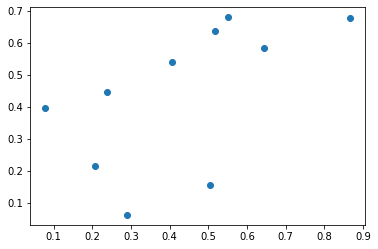

In [ ]:
plt.scatter(
    np.random.rand(10),  # абсциссы (координаты x) точек
    np.random.rand(10)  # ординаты (координаты y) точек
)
plt.show()

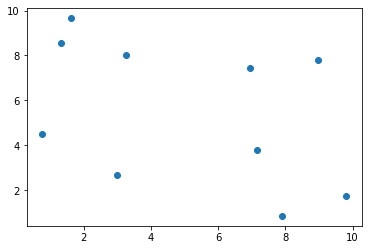

In [ ]:
plt.scatter(
    np.random.rand(10) * 10,  # абсциссы точек
    np.random.rand(10) * 10  # ординаты точек
)
plt.show()

Прямоугольные области (патчи, [patches](https://matplotlib.org/3.1.1/api/patches_api.html)):

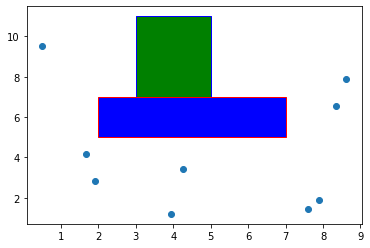

In [ ]:
import matplotlib.patches as mpatches

figure, ax = plt.subplots(1)

rect1 = mpatches.Rectangle((2, 5), 5, 2, edgecolor='r', facecolor="b", alpha = .5)
rect2 = mpatches.Rectangle((3, 6), 2, 5, edgecolor='b', facecolor="g")

#print(dir(rect))

ax.scatter(
    np.random.rand(10) * 10,  # абсциссы точек
    np.random.rand(10) * 10  # ординаты точек
)

ax.add_patch(rect2)
ax.add_patch(rect1)


plt.show()

Кривая линия:

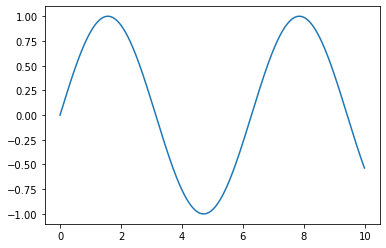

In [ ]:
plt.plot(
    np.arange(0, 10, 0.01),  # абсциссы точек
    np.sin(np.arange(0, 10, 0.01))  # ординаты точек
)
plt.show()

Текст:

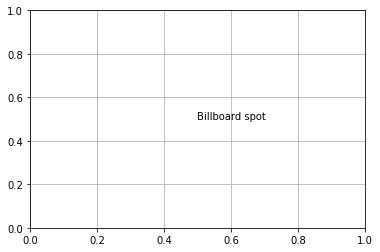

In [ ]:
plt.text(
    0.5,  # Абсцисса начала текста в координатах графика
    0.5,  # Ордината начала текста в координатах графика
    'Billboard spot'  # собственно ваш текст
)

plt.grid()
plt.show()

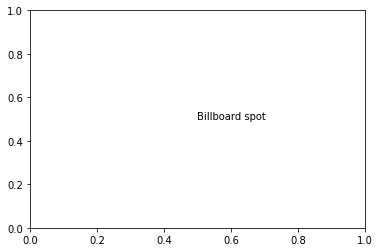

In [ ]:
plt.text(0.5, 0.5, 'Billboard spot')
plt.show()

### 2.2. Диаграммы

Столбцовая диаграмма:

[0 8 5 8 3 0 4 9 8 3]


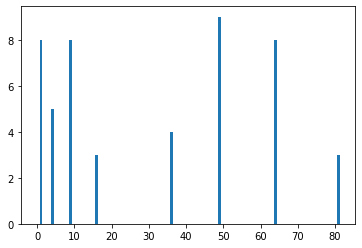

In [ ]:
height = np.random.randint(low=0, high=10, size=10)
print(height)

plt.bar(
    np.arange(10) ** 2,  # Позиции столбцов
    height  # Высоты столбцов
)
#plt.text(50, 5, 'Billboard spot')
plt.show()

Гистограмма:

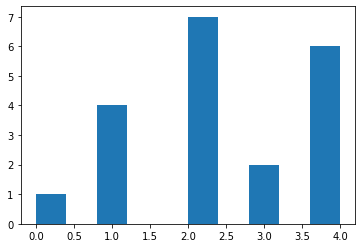

In [ ]:
array = np.random.randint(low=0, high=5, size=20)
plt.hist(array)
plt.show()

Круговая диаграмма:

[ 1  2  3  4  5  6  7  8  9 10]


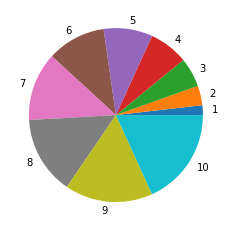

In [ ]:
plt.pie(
    np.arange(1, 11),
    labels=list(map(str, range(1,11)))
)
plt.show()

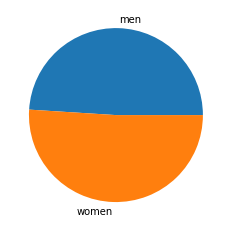

In [ ]:
plt.pie(
    np.array([490, 510]),
    labels=['men', 'women']
)
plt.show()

[Ящик с усами](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8):
- ящик показывает диапазон от 25 до 75 квантиля (1й и 3й квартили)
- черта в ящике - медиана
- усы - квартили +- 1.5 межквартильного размаха (IQR)
- круглые точки - "выбросы"

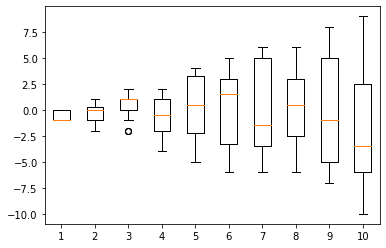

In [ ]:
plt.boxplot(
    [
        np.random.randint(low=-i, high=i, size=20) # Значения по которым строится ящик №i
        for i in range(1, 11)
    ]
)
plt.show()

Ломаная с "крестами ошибок" - в каждой точке графика откладываются ошибки измерений по абсциссе и ординате:

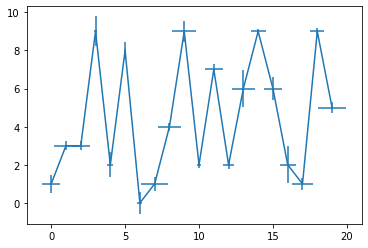

In [ ]:
plt.errorbar(
    np.arange(20),  # абсциссы точек
    np.random.randint(low=0, high=10, size=20),  # ординаты точек
    xerr=np.random.rand(20),  # ошибки расположения каждой точки по оси x
    yerr=np.random.rand(20)  # ошибки расположения каждой точки по оси y
)
plt.show()

### 2.3. Отображения

Тепловая карита, или цветовое представление двумерного массива (heatmap):

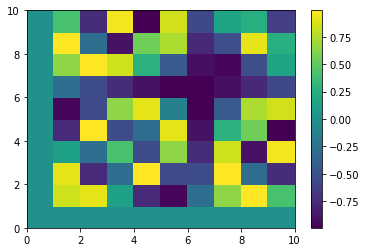

In [ ]:
# # Построить цветовую карту
color_map = plt.pcolormesh(
    np.sin(np.outer(np.arange(10), np.arange(10)))  # двумерный массив значений
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()

In [ ]:
np.outer(np.arange(10), np.arange(10))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

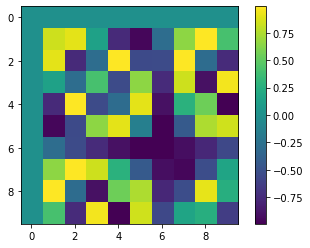

In [ ]:
# Построить цветовую карту
color_map = plt.imshow(
    np.sin(np.outer(np.arange(10), np.arange(10)))  # рандомное RGB - изображение, цветовые каналы представлены числaми из [0,1]
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()

А в чём разница?

- `imshow` представляет ячейки как обязательно квадратные, может работать с тремя каналами
- `pcolormesh` может рисовать ячейки разных форм

In [ ]:
X = np.array([[0, 1, 3.5, 4.5],
              [0, 1, 4, 5],
              [0, 1, 4, 5.5],
              [0, 1, 3.5, 5.5]])
Y = np.array([[0, 0, 0, 0.125],
              [1, 1, 1, 1.25],
              [2, 2, 2, 2.5],
              [3, 3, 3, 3]])

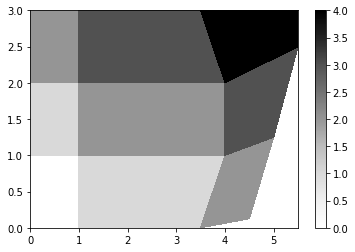

In [ ]:
color_map = plt.pcolormesh(
    X, Y,
    np.arange(4)[:, None] + np.arange(4)[None, :],
    cmap='Greys'
)

plt.colorbar(color_map)
plt.show()

## Сохранение рисунков в файл

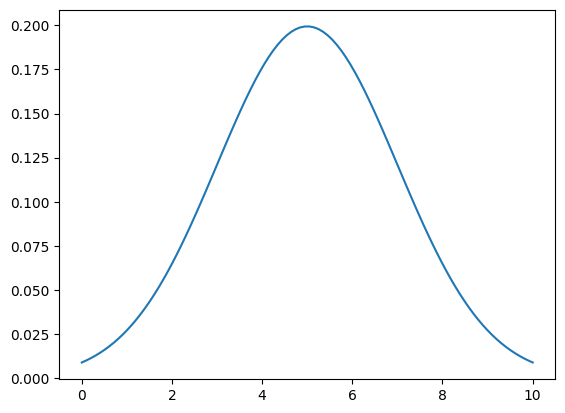

In [ ]:
x=np.linspace(0,10,100)
y=1/(2*np.sqrt(2*np.pi)) * np.exp(-(x-5)**2/8)

plt.plot(x, y)
plt.savefig('filename.png', dpi=420)